In [2]:
from os import chdir, getcwd
getcwd()
chdir('\\\\Wil-entsasprd06\\digitalanalytics\\D17911_Lu\\Prioritization Model')

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


roadmap = pd.read_csv('Road Map Data_P.csv', sep=',')
roadmap.head(5)
roadmap.dropna(how = 'all', inplace = True )
roadmap.tail(3)

,Feature,Release Label,User Type,User Impact,User Impact Score,Voice of the Client,VoC Score,App Store Feedback,App Store Feedback Score,Business Value(Total $ Revenue or Cost Savings ),...,Risk Reduction/Opportunity Enablement,Risk Reduction Score,Third-Party Data(Research Studies),Third-party Data Score,Organizational Value,/,Work Effort,Work Effort Score,Size Point,Priority Score
122,U Web Contact Information in Profile and Settings,0,Retail,250K-500K,5,NaN,NaN,NaN,NaN,$0-100K,...,Low,1,Javelin,2.0,12,NaN,S,2,20,6.0
123,Update Contact Information bi-annual Splash Page,0,Retail,Over 1MM,13,NaN,NaN,NaN,NaN,$0-100K,...,Med,3,NaN,NaN,25,NaN,L,5,200,5.0
124,Make Credit Card Rewards a Default Tile,0,Retail,500K-1MM,8,20-10,1.0,NaN,NaN,$0-100K,...,Low,1,NaN,NaN,14,NaN,L,5,200,2.8


In [2]:
roadmap['VoC Score'].fillna(inplace = True, value = 0)
roadmap['App Store Feedback Score'].fillna(inplace = True, value = 0)
roadmap['Third-party Data Score'].fillna(inplace = True, value = 0)
roadmap['Work Effort Score'].fillna(inplace = True, value = 0)

roadmap.tail(3)

,Feature,Release Label,User Type,User Impact,User Impact Score,Voice of the Client,VoC Score,App Store Feedback,App Store Feedback Score,Business Value(Total $ Revenue or Cost Savings ),...,Risk Reduction/Opportunity Enablement,Risk Reduction Score,Third-Party Data(Research Studies),Third-party Data Score,Organizational Value,/,Work Effort,Work Effort Score,Size Point,Priority Score
122,U Web Contact Information in Profile and Settings,0,Retail,250K-500K,5,NaN,0.0,NaN,0.0,$0-100K,...,Low,1,Javelin,2.0,12,NaN,S,2,20,6.0
123,Update Contact Information bi-annual Splash Page,0,Retail,Over 1MM,13,NaN,0.0,NaN,0.0,$0-100K,...,Med,3,NaN,0.0,25,NaN,L,5,200,5.0
124,Make Credit Card Rewards a Default Tile,0,Retail,500K-1MM,8,20-10,1.0,NaN,0.0,$0-100K,...,Low,1,NaN,0.0,14,NaN,L,5,200,2.8


In [3]:
roadmap['Release Label'].value_counts()

0    67
1    58
Name: Release Label, dtype: int64

<IPython.core.display.Javascript object>


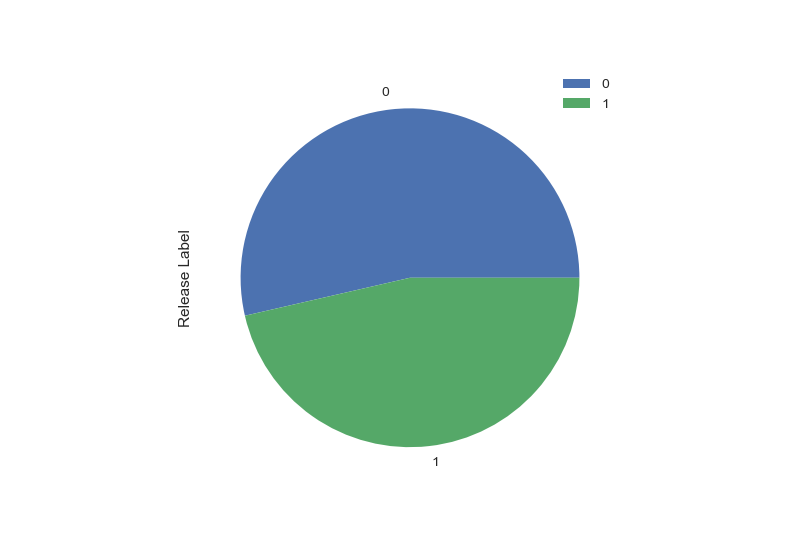

In [3]:
%matplotlib notebook
plt.figure()
roadmap['Release Label'].value_counts().plot(kind='pie', legend = True)

<IPython.core.display.Javascript object>


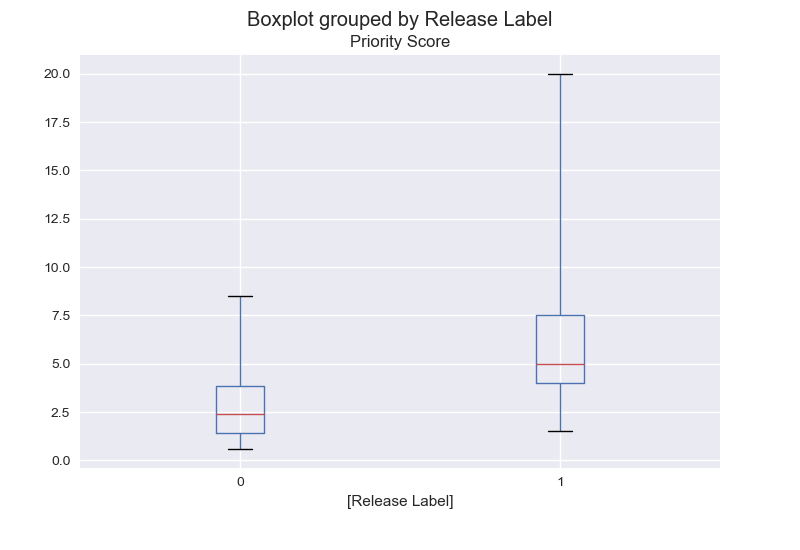

In [63]:
roadmap.boxplot(column=['Priority Score'], by = ['Release Label'], whis = 'range')
plt.show()

<IPython.core.display.Javascript object>


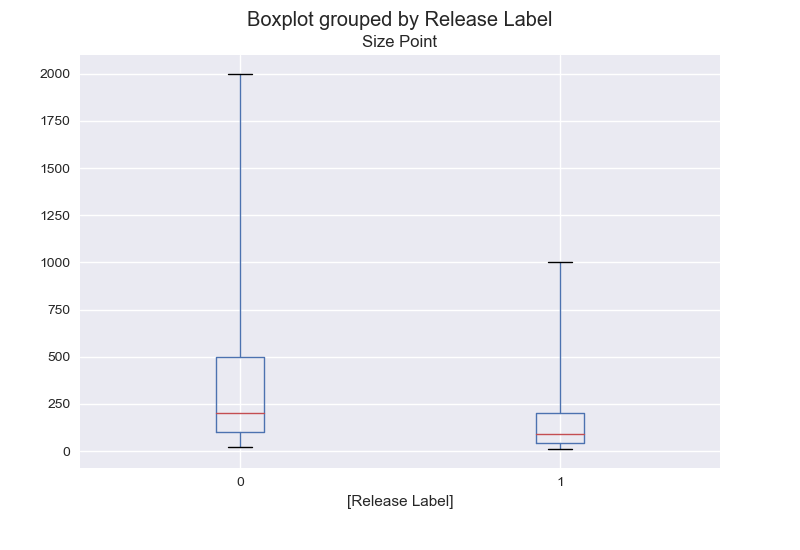

In [4]:
roadmap.boxplot(column=['Size Point'], by = ['Release Label'], whis = 'range')
plt.show()

<IPython.core.display.Javascript object>


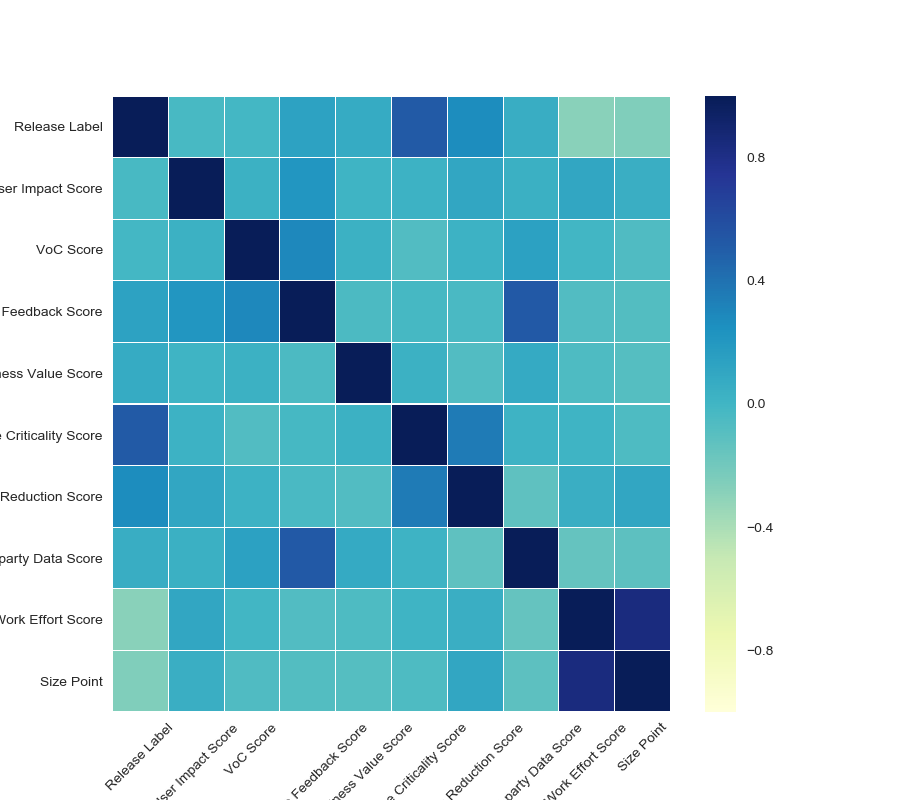

In [25]:
dataframe = roadmap[['Release Label', 'User Impact Score', 'VoC Score', 'App Store Feedback Score', 'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score',
                     'Size Point']]

dataframe.tail(3)
correlation_matrix = dataframe.corr()
f, ax = plt.subplots(figsize = (9, 8))
sn.heatmap(correlation_matrix, ax = ax, cmap = 'YlGnBu', linewidths = 0.1)
## locs, labels = plt.xticks()
## plt.setp(labels, rotation=0)
locs, labels = plt.yticks()
plt.setp(labels, rotation=0)
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>


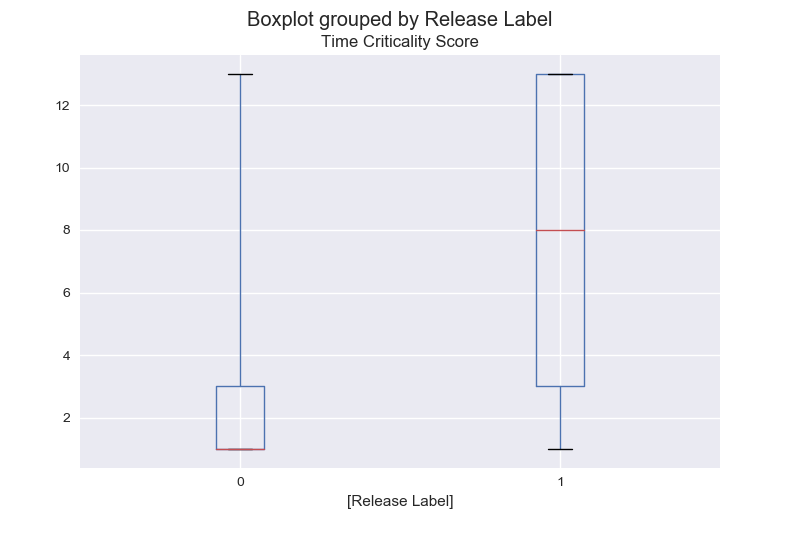

In [5]:
roadmap.boxplot(column=['Time Criticality Score'], by = ['Release Label'], whis = 'range')
plt.show()


In [38]:
y_train = dataframe[['Release Label']]
x_train = dataframe[['User Impact Score', 'VoC Score', 'App Store Feedback Score', 'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score']]

In [39]:
y_train.head(3)

,Release Label
0,0
1,1
2,0


In [64]:
x_train.head(3)

,User Impact Score,VoC Score,App Store Feedback Score,Business Value Score,Time Criticality Score,Risk Reduction Score,Third-party Data Score,Work Effort Score
0,2,0.0,0.0,1,8,13,0.0,13
1,5,0.0,0.0,1,13,8,0.0,3
2,5,0.0,0.0,1,1,1,0.0,2


<IPython.core.display.Javascript object>


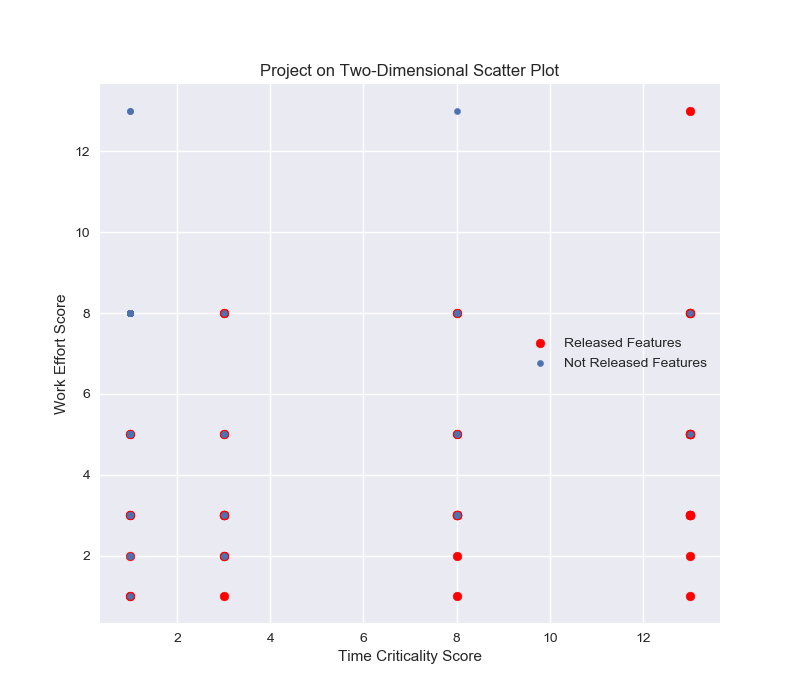

In [37]:
X = dataframe.iloc[:, :-1]
release = X[X['Release Label']==1]
not_release = X[X['Release Label']==0]
f, ax = plt.subplots(figsize = (8, 7))

plt.scatter(release['Time Criticality Score'], release['Work Effort Score'], s=40, label='Released Features', c='red')
plt.scatter(not_release['Time Criticality Score'], not_release['Work Effort Score'], s=20, label='Not Released Features')

plt.title('Project on Two-Dimensional Scatter Plot')
plt.xlabel('Time Criticality Score')
plt.ylabel('Work Effort Score')
plt.legend() 
plt.show();

In [53]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

#fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

clf = LogisticRegression().fit(x_train, y_train)
title = 'Logistic regression, Prioritization Model data C = {:.3f}'.format(1.0)
#plot_class_regions_for_classifier_subplot(clf, x_train.as_matrix(), 
 #                                         y_train.as_matrix(), None, None, title = title, subplot = subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_train)
matrix = confusion_matrix(y_train, y_pred)
print(matrix)



Accuracy of Logistic regression classifier on training set: 0.81
[[58  9]
 [15 43]]


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<IPython.core.display.Javascript object>


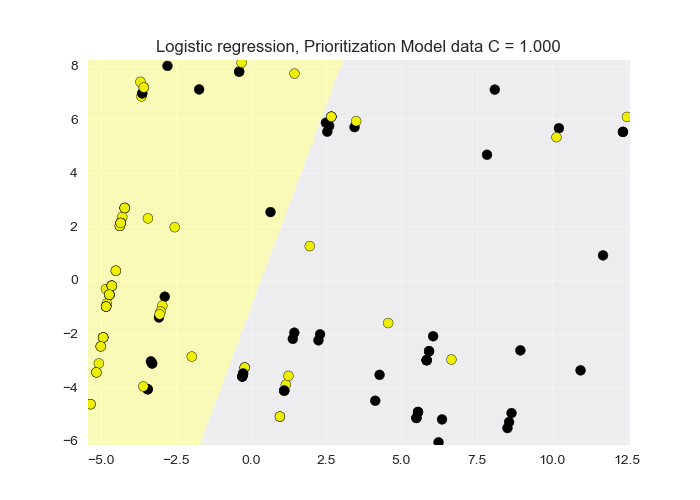

Accuracy of Logistic regression classifier on training set: 0.75


In [68]:
## Use Principle Component to Visualize the Decision Boundary
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(x_train)

from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

clf = LogisticRegression().fit(pca, np.array(y_train).ravel())
title = 'Logistic regression, Prioritization Model data C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, pca, 
                                          np.array(y_train).ravel(), None, None, title = title, subplot = subaxes)

 print('Accuracy of Logistic regression classifier on Principle Components: {:.2f}'.format(clf.score(pca, y_train)))



C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<IPython.core.display.Javascript object>


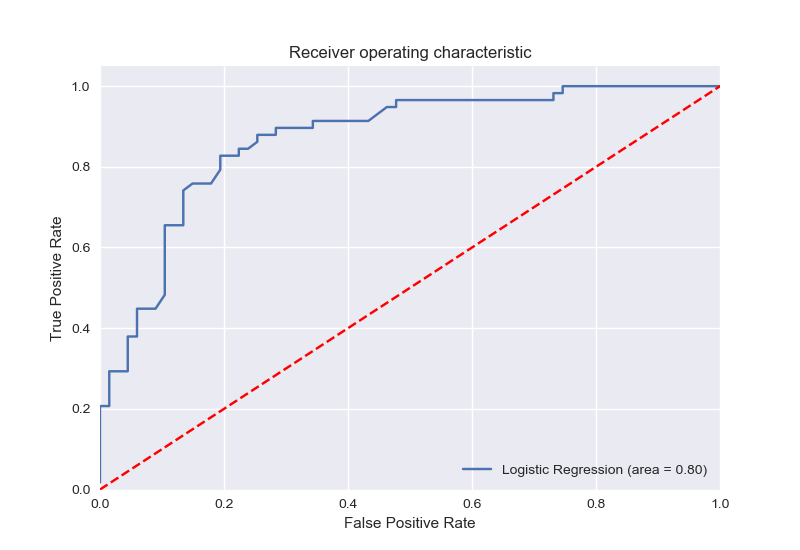

In [80]:
clf = LogisticRegression().fit(x_train, y_train)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_train, clf.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [102]:
y_train = dataframe[['Release Label']]
x_train = dataframe[['User Impact Score', 'VoC Score', 'Business Value Score', 
                     'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score']]
clf = LogisticRegression().fit(x_train, y_train)
print(clf.coef_)
print(clf.intercept_)
print(clf.decision_function)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
# ['User Impact Score', 'VoC Score', 'App Store Feedback Score', 'Business Value Score', 
#  'Time Criticality Score', 'Risk Reduction Score', 'Third-party Data Score', 'Work Effort Score']

[[ 0.    0.03  0.11  0.3   0.12 -0.02 -0.39]]
[-0.31]
<bound method LinearClassifierMixin.decision_function of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>
Accuracy of Logistic regression classifier on training set: 0.79


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
lm = LogisticRegression()
lm.fit(x_train, y_train)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(x_train)

newX = pd.DataFrame({"Constant":np.ones(len(x_train))}).join(pd.DataFrame(x_train))
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unable to coerce to Series, length must be 1: given 125